# Step 0: Import libraries and Dataset

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
dataset = pd.read_csv('dataset.csv', skiprows=2)

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
# For example, if your dataset is a CSV file named 'data.csv', you can load it like this:
# df = pd.read_csv('data.csv')

# List of columns you want to encode
columns_to_encode = ['Sex', 'Clinical FMPA', 'Naso-Labial Sulcus', 'Habits', 'Incisors', 'Canine', 'Molars', 'Diagnosis']

# Dictionary to store label mappings for each column
label_mappings = {}

# Iterate over each column
for column in columns_to_encode:
    categories = dataset[column].tolist()
    
    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()
    
    # Fit and transform the data
    encoded_labels = label_encoder.fit_transform(categories)
    
    # Store label mappings for the column
    label_mappings[column] = dict(zip(label_encoder.classes_, encoded_labels))

# Print the label mappings
for column, mapping in label_mappings.items():
    print(f"Label mapping for {column}:")
    print(mapping)
    print()


Label mapping for Sex:
{'Female': 1, 'Male': 0}

Label mapping for Clinical FMPA:
{'Average': 0, 'High': 1, 'Low': 1}

Label mapping for Naso-Labial Sulcus:
{'Acute': 0, 'Average': 5, 'Deep': 0, 'Low': 0, 'Normal': 5, 'Obtuse': 5}

Label mapping for Habits:
{'NRH': 0, 'bruxism': 0, 'lip biting': 0, 'mouth breathing': 0, 'mr': 0, 'thumb sucking': 5, 'tongue thrusting': 0}

Label mapping for Incisors:
{'Class 1': 1, 'Class 2': 0, 'Class 3': 1, 'Open bite': 1, "can't be related": 0}

Label mapping for Canine:
{'Class 1': 2, 'Class 1 bilaterally': 2, 'Class 2': 2, 'Class 2 bilaterally': 2, 'Class 3': 0, 'Class 3 bilaterally': 0, "can't be related": 2}

Label mapping for Molars:
{'Class 1': 2, 'Class 1 bilaterally': 2, 'Class 2': 2, 'Class 2 bilaterally': 2, 'Class 3': 0, 'Class 3 bilaterally': 0, "can't be related": 2}

Label mapping for Diagnosis:
{'Angles Class 1 malocclusion': 2, 'Angles Class 2 canine relation': 2, 'Angles Class 2 malocclusion': 2, 'Angles Class 3 maloclussion': 2}



# Step 1: Descriptive Statistics

In [8]:
# Preview data
dataset.head()

,Name,Age,Sex,Clinical FMPA,Naso-Labial Sulcus,Habits,Incisors,Canine,Molars,Overbite,...,ANB,UI TO NA( ),UI TO NA(angle),LI TO NB( ),LI TO NB(angle),Extra1,Extra2,Max:mand -2:3,Treatment objectives,Diagnosis
0,Nithesh,25,Male,Average,Acute,NRH,Class 2,Class 2,Class 2,2.0,...,3,10,29,10,34,1.90,3.10,0.612903,Non extraction line of treatment,Angles Class 2 malocclusion
1,Meghana R,22,Female,High,Obtuse,NRH,Class 1,Class 2,Class 2,85.0,...,3,-1,7,-5,10,1.97,3.03,0.650165,Non extraction line of treatment,Angles Class 2 malocclusion
2,Ravi gowda,14,Male,High,Acute,NRH,Class 2,Class 2,Class 2,6.0,...,6,10,32,7,27,2.00,3.60,0.555556,twin block appliance,Angles Class 2 malocclusion
3,Umer,12,Male,Low,Acute,NRH,Class 2,Class 2,Class 2,8.0,...,3,11,43,4,25,2.20,2.80,0.785714,twin block appliance,Angles Class 2 malocclusion
4,Shri Harshitha,20,Female,High,Obtuse,NRH,Class 1,Class 1,Class 1,35.0,...,4,11,35,11,37,1.90,3.10,0.612903,Extraction line of treatment,Angles Class 1 malocclusion


In [9]:
col=['Name','Extra1','Extra2','Treatment objectives']
df=dataset.drop(col,axis="columns")

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
category=['Sex','Clinical FMPA','Naso-Labial Sulcus','Habits','Incisors','Canine','Molars','Diagnosis']
d=df[category].apply(le.fit_transform)

In [12]:
final = df.drop(['Sex','Clinical FMPA','Naso-Labial Sulcus','Habits','Incisors','Canine','Molars','Diagnosis'], axis='columns')
final

,Age,Overbite,Overjet,Mandibular plane angle,Lower incisor to mandibular plane,Basal Plane Angle,Y Axis,U1 To Sn,SNA,SNB,ANB,UI TO NA( ),UI TO NA(angle),LI TO NB( ),LI TO NB(angle),Max:mand -2:3
0,25,2.0,5.0,20.0,112,23,65,113,83.0,0,3,10,29,10,34,0.612903
1,22,85.0,1.0,18.0,87,19,57,92,87.0,84,3,-1,7,-5,10,0.650165
2,14,6.0,125.0,30.0,94,25,72,106,76.0,70,6,10,32,7,27,0.555556
3,12,8.0,11.0,14.0,106,14,62,124,82.0,79,3,11,43,4,25,0.785714
4,20,35.0,3.0,23.0,102,27,65,120,86.0,82,4,11,35,11,37,0.612903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,18,2.0,6.0,30.0,105,26,70,106,84.0,82,2,9,29,10,28,0.666667
636,19,6.0,10.0,15.0,120,15,62,120,88.0,81,7,9,35,10,42,0.672241
637,28,4.0,8.0,29.0,100,23,66,126,81.0,79,2,12,47,5,29,0.666667
638,14,6.0,16.0,28.0,98,20,66,106,72.0,71,1,10,35,4,16,0.666667


In [13]:
merged = pd.concat([final,d],axis='columns')
merged

,Age,Overbite,Overjet,Mandibular plane angle,Lower incisor to mandibular plane,Basal Plane Angle,Y Axis,U1 To Sn,SNA,SNB,...,LI TO NB(angle),Max:mand -2:3,Sex,Clinical FMPA,Naso-Labial Sulcus,Habits,Incisors,Canine,Molars,Diagnosis
0,25,2.0,5.0,20.0,112,23,65,113,83.0,0,...,34,0.612903,1,0,0,0,1,2,2,2
1,22,85.0,1.0,18.0,87,19,57,92,87.0,84,...,10,0.650165,0,1,5,0,0,2,2,2
2,14,6.0,125.0,30.0,94,25,72,106,76.0,70,...,27,0.555556,1,1,0,0,1,2,2,2
3,12,8.0,11.0,14.0,106,14,62,124,82.0,79,...,25,0.785714,1,2,0,0,1,2,2,2
4,20,35.0,3.0,23.0,102,27,65,120,86.0,82,...,37,0.612903,0,1,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,18,2.0,6.0,30.0,105,26,70,106,84.0,82,...,28,0.666667,0,1,1,0,1,1,1,0
636,19,6.0,10.0,15.0,120,15,62,120,88.0,81,...,42,0.672241,1,2,5,0,1,3,3,0
637,28,4.0,8.0,29.0,100,23,66,126,81.0,79,...,29,0.666667,0,0,5,5,1,3,3,0
638,14,6.0,16.0,28.0,98,20,66,106,72.0,71,...,16,0.666667,1,0,1,0,1,3,3,0


In [14]:
mean_angle = merged['Mandibular plane angle'].mean()
merged['Mandibular plane angle'].fillna(mean_angle, inplace=True)


In [16]:
import pandas as pd
merged.to_csv('datanew.csv')

In [11]:
Y = merged['Diagnosis']
Y

0      2
1      2
2      2
3      2
4      0
      ..
635    0
636    0
637    0
638    0
639    0
Name: Diagnosis, Length: 640, dtype: int32

In [12]:
X = merged.drop('Diagnosis',axis='columns')
X

,Age,Overbite,Overjet,Mandibular plane angle,Lower incisor to mandibular plane,Basal Plane Angle,Y Axis,U1 To Sn,SNA,SNB,...,LI TO NB( ),LI TO NB(angle),Max:mand -2:3,Sex,Clinical FMPA,Naso-Labial Sulcus,Habits,Incisors,Canine,Molars
0,25,2.0,5.0,20.0,112,23,65,113,83.0,0,...,10,34,0.612903,1,0,0,0,1,2,2
1,22,85.0,1.0,18.0,87,19,57,92,87.0,84,...,-5,10,0.650165,0,1,5,0,0,2,2
2,14,6.0,125.0,30.0,94,25,72,106,76.0,70,...,7,27,0.555556,1,1,0,0,1,2,2
3,12,8.0,11.0,14.0,106,14,62,124,82.0,79,...,4,25,0.785714,1,2,0,0,1,2,2
4,20,35.0,3.0,23.0,102,27,65,120,86.0,82,...,11,37,0.612903,0,1,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,18,2.0,6.0,30.0,105,26,70,106,84.0,82,...,10,28,0.666667,0,1,1,0,1,1,1
636,19,6.0,10.0,15.0,120,15,62,120,88.0,81,...,10,42,0.672241,1,2,5,0,1,3,3
637,28,4.0,8.0,29.0,100,23,66,126,81.0,79,...,5,29,0.666667,0,0,5,5,1,3,3
638,14,6.0,16.0,28.0,98,20,66,106,72.0,71,...,4,16,0.666667,1,0,1,0,1,3,3


In [13]:
# Dataset dimensions - (rows, columns)
merged.shape

(640, 24)

In [14]:
# Features data-type
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                640 non-null    int64  
 1   Overbite                           640 non-null    float64
 2   Overjet                            640 non-null    float64
 3   Mandibular plane angle             640 non-null    float64
 4   Lower incisor to mandibular plane  640 non-null    int64  
 5   Basal Plane Angle                  640 non-null    int64  
 6   Y Axis                             640 non-null    int64  
 7   U1 To Sn                           640 non-null    int64  
 8   SNA                                640 non-null    float64
 9   SNB                                640 non-null    int64  
 10  ANB                                640 non-null    int64  
 11  UI TO NA( )                        640 non-null    int64  

In [15]:
# Statistical summary
merged.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,640.0,19.603125,5.810680,9.000000,15.000000,19.000000,23.000000,42.000
Overbite,640.0,4.792969,8.986411,-5.000000,2.000000,3.000000,5.000000,85.000
Overjet,640.0,4.957813,8.567175,-3.000000,2.000000,4.000000,6.000000,125.000
Mandibular plane angle,640.0,28.505804,15.358967,11.000000,23.000000,28.000000,32.000000,235.000
Lower incisor to mandibular plane,640.0,104.065625,50.428357,12.000000,95.000000,102.000000,108.000000,985.000
Basal Plane Angle,640.0,23.840625,6.737388,10.000000,20.000000,24.000000,28.000000,90.000
Y Axis,640.0,65.904687,4.667536,52.000000,63.000000,66.000000,69.000000,77.000
U1 To Sn,640.0,112.575000,8.507973,80.000000,108.000000,113.000000,118.000000,134.000
SNA,640.0,81.548594,5.032010,0.100000,80.000000,82.000000,84.000000,90.000
SNB,640.0,78.037500,5.882669,0.000000,75.000000,78.000000,81.000000,90.000


In [16]:
# Count of null values
merged.isnull().sum()

Age                                  0
Overbite                             0
Overjet                              0
Mandibular plane angle               0
Lower incisor to mandibular plane    0
Basal Plane Angle                    0
Y Axis                               0
U1 To Sn                             0
SNA                                  0
SNB                                  0
ANB                                  0
UI TO NA( )                          0
UI TO NA(angle)                      0
LI TO NB( )                          0
LI TO NB(angle)                      0
Max:mand -2:3                        0
Sex                                  0
Clinical FMPA                        0
Naso-Labial Sulcus                   0
Habits                               0
Incisors                             0
Canine                               0
Molars                               0
Diagnosis                            0
dtype: int64

# Step 3: Data Preprocessing

In [17]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(merged)

In [18]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [19]:
X = merged.drop('Diagnosis',axis='columns')
Y =merged['Diagnosis']

In [20]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [21]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (512, 23)
X_test shape: (128, 23)
Y_train shape: (512,)
Y_test shape: (128,)


# Step 4: Data Modelling

In [22]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [23]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [24]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [25]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [26]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [27]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [28]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

# Step 5: Model Evaluation

In [29]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
# accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [30]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
# print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 72.65625
Support Vector Classifier: 76.5625
Naive Bayes: 66.40625
Decision tree: 90.625
Random Forest: 92.96875


In [31]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_ranfor)
cm

array([[69,  4,  0],
       [ 5, 43,  0],
       [ 0,  0,  7]], dtype=int64)

<Axes: >

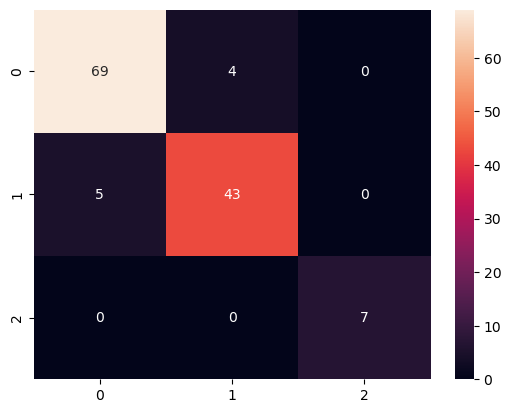

In [32]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

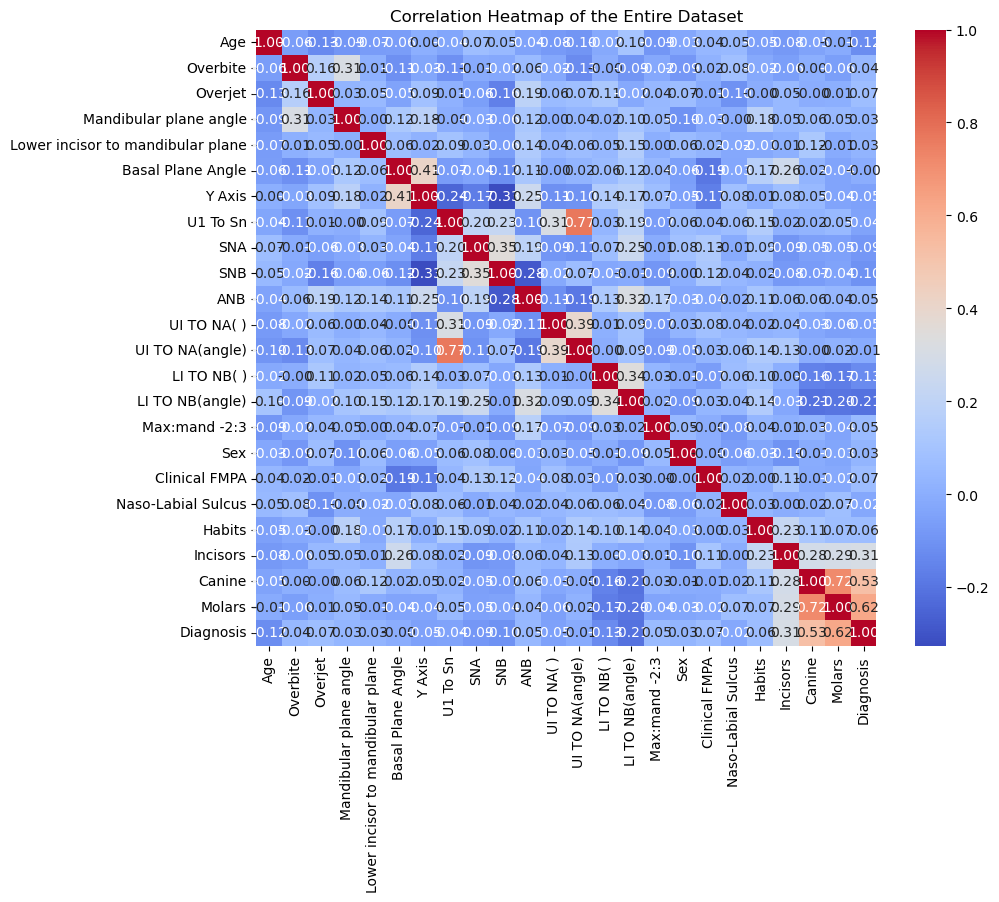

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(merged.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Adjust the colormap and other parameters as needed

# Step 4: Display the heatmap
plt.title('Correlation Heatmap of the Entire Dataset')
plt.show()

In [34]:
correlation_matrix = merged.corr()

# Find the highest correlation
highest_correlation = correlation_matrix.unstack().sort_values().drop_duplicates().iloc[-2]

# Find the lowest correlation
lowest_correlation = correlation_matrix.unstack().sort_values().drop_duplicates().iloc[0]

print("Highest correlation:", highest_correlation)
print("Lowest correlation:", lowest_correlation)

Highest correlation: 0.772116776915417
Lowest correlation: -0.32553928630056844


In [35]:
# Assuming 'merged' is your DataFrame containing the data
correlation_matrix = merged.corr()

# Get the highest correlation values for each pair of variables
highest_correlations = correlation_matrix.unstack().sort_values(ascending=False)

# Filter out correlations with a value of 1 (since they represent correlation of a variable with itself)
highest_correlations = highest_correlations[highest_correlations != 1]

# Print the pairs of variables with the highest correlation values
print("Highest correlations:")
print(highest_correlations.head(10))  # You can adjust the number of correlations to display as needed

# You can similarly find the lowest correlations using the 'ascending=True' parameter
lowest_correlations = correlation_matrix.unstack().sort_values(ascending=True)

# Filter out correlations with a value of -1 (since they represent negative correlation of a variable with itself)
lowest_correlations = lowest_correlations[lowest_correlations != -1]

# Print the pairs of variables with the lowest correlation values
print("\nLowest correlations:")
print(lowest_correlations.head(10))  # You can adjust the number of correlations to display as needed


Highest correlations:
UI TO NA(angle)    U1 To Sn             0.772117
U1 To Sn           UI TO NA(angle)      0.772117
Molars             Canine               0.717522
Canine             Molars               0.717522
Diagnosis          Molars               0.621743
Molars             Diagnosis            0.621743
Diagnosis          Canine               0.527633
Canine             Diagnosis            0.527633
Y Axis             Basal Plane Angle    0.413109
Basal Plane Angle  Y Axis               0.413109
dtype: float64

Lowest correlations:
SNB              Y Axis            -0.325539
Y Axis           SNB               -0.325539
ANB              SNB               -0.284707
SNB              ANB               -0.284707
U1 To Sn         Y Axis            -0.244445
Y Axis           U1 To Sn          -0.244445
LI TO NB(angle)  Diagnosis         -0.208281
Diagnosis        LI TO NB(angle)   -0.208281
LI TO NB(angle)  Canine            -0.208184
Canine           LI TO NB(angle)   -0.208184
d

In [103]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_ranfor))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        73
           2       0.91      0.90      0.91        48
           3       1.00      1.00      1.00         7

    accuracy                           0.93       128
   macro avg       0.95      0.95      0.95       128
weighted avg       0.93      0.93      0.93       128



# Step6: Model Pickling

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import pickle

In [93]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
dataset_scaled = sc.fit_transform(X)

In [94]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [95]:
X = dataset_scaled
Y =Y

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [97]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [98]:
ranfor.score(X_test, Y_test)

0.9296875

In [99]:
Y_pred = ranfor.predict(X_test)

In [102]:
pickle.dump(ranfor, open('./model.pkl','wb'))
model = pickle.load(open('./model.pkl','rb'))
print("Model exported")
print(model.predict(X_test))

Model exported
[2 3 2 0 0 0 0 2 3 2 2 0 0 0 2 0 0 0 0 0 0 0 2 0 2 2 0 3 2 0 3 0 0 0 2 0 3
 0 2 0 0 0 0 2 0 2 0 2 2 2 0 0 0 0 2 2 0 0 0 0 2 2 2 2 0 0 2 0 2 0 0 2 0 2
 2 2 0 3 0 2 0 0 2 0 0 0 0 3 0 0 2 0 2 0 0 0 2 0 2 0 0 0 2 0 0 2 0 2 2 0 2
 0 2 0 0 2 0 2 0 0 2 0 0 0 2 2 2 0]


# Data Visualization

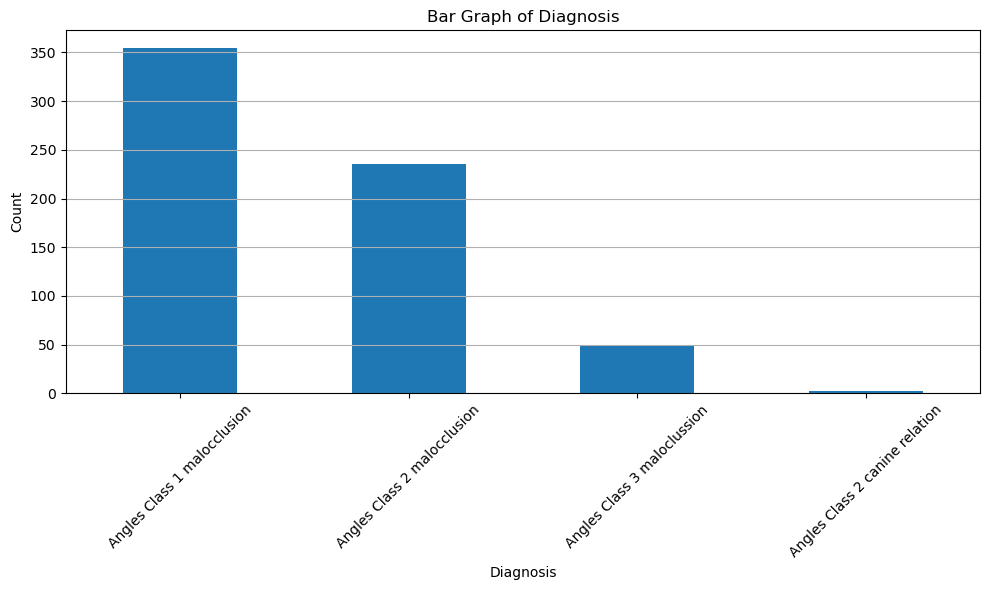

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

column_to_visualize = 'Diagnosis'

# Count the occurrences of each value in the specified column
value_counts = df[column_to_visualize].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Bar Graph of {}'.format(column_to_visualize))
plt.xlabel('{}'.format(column_to_visualize))
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


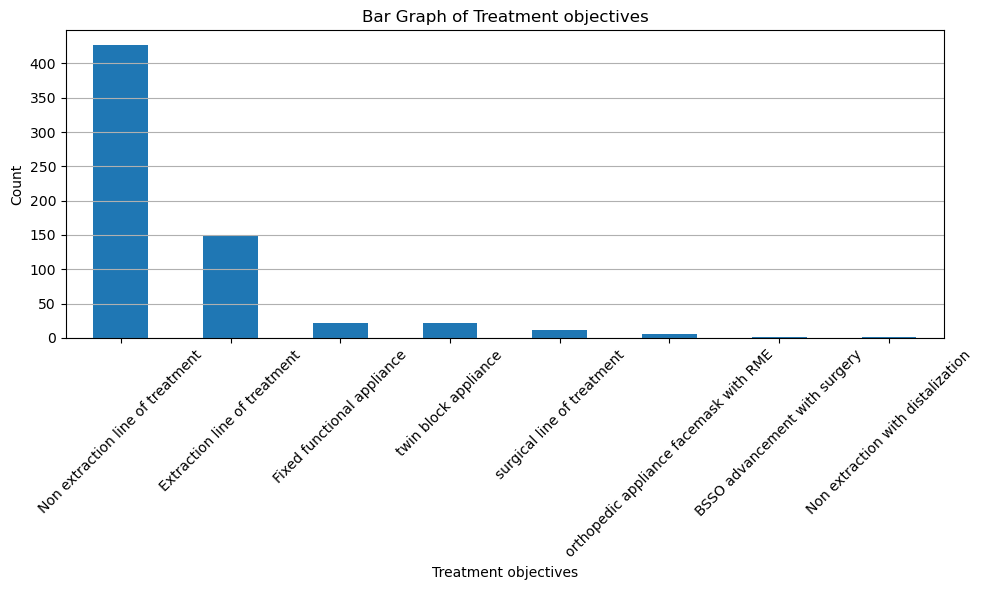

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

column_to_visualize = 'Treatment objectives'

# Count the occurrences of each value in the specified column
value_counts = dataset[column_to_visualize].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Bar Graph of {}'.format(column_to_visualize))
plt.xlabel('{}'.format(column_to_visualize))
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


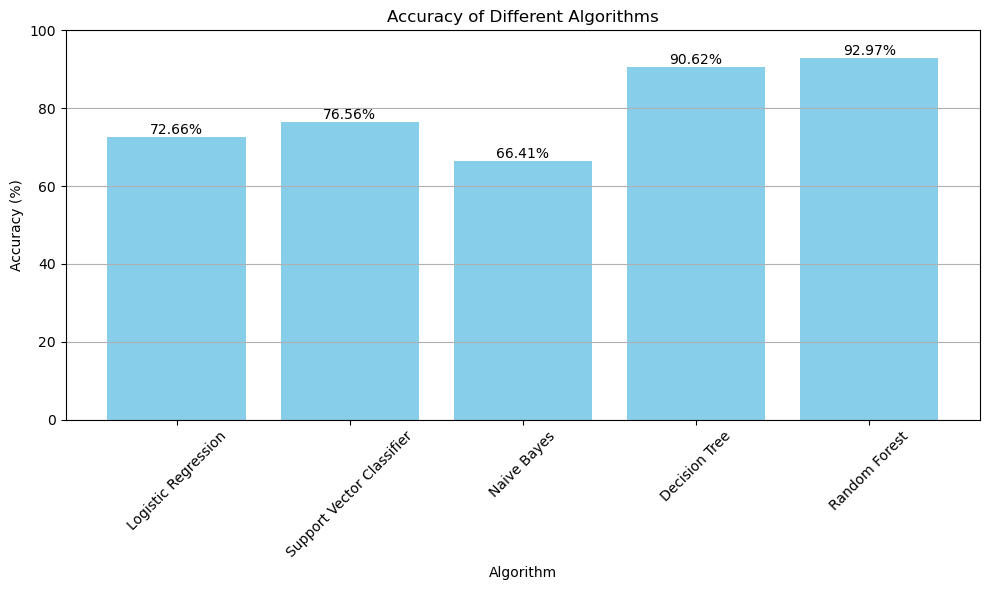

In [125]:
import matplotlib.pyplot as plt

# Algorithm names and accuracy scores
algorithm_names = ["Logistic Regression", "Support Vector Classifier", "Naive Bayes", "Decision Tree", "Random Forest"]
accuracy_scores = [accuracy_logreg, accuracy_svc, accuracy_nb, accuracy_dectree, accuracy_ranfor]

# Convert accuracy scores to percentages
accuracy_percentages = [score * 100 for score in accuracy_scores]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithm_names, accuracy_percentages, color='skyblue')
plt.title('Accuracy of Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Limit y-axis to range from 0 to 100
plt.xticks(rotation=45)
plt.grid(axis='y')

# Annotate each bar with its corresponding accuracy percentage value
for bar, percentage in zip(bars, accuracy_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have your data loaded into X (features) and y (labels)
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Dictionary to store results
results = {'Algorithm': [],
           'Accuracy': [],
           'Precision': [],
           'Recall': [],
           'F1 Score': []}

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
results['Algorithm'].append('Logistic Regression')
results['Accuracy'].append(accuracy_logreg)
results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
results['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))

# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
results['Algorithm'].append('Support Vector Classifier')
results['Accuracy'].append(accuracy_svc)
results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
results['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))

# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)
results['Algorithm'].append('Naive Bayes')
results['Accuracy'].append(accuracy_nb)
results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
results['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
results['Algorithm'].append('Decision Tree')
results['Accuracy'].append(accuracy_dectree)
results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
results['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
results['Algorithm'].append('Random Forest')
results['Accuracy'].append(accuracy_ranfor)
results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
results['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))

# Create DataFrame to display results
results_df = pd.DataFrame(results)
print(results_df)


                   Algorithm  Accuracy  Precision    Recall  F1 Score
0        Logistic Regression  0.726562   0.793380  0.789062  0.787833
1  Support Vector Classifier  0.765625   0.816913  0.812500  0.811392
2                Naive Bayes  0.664062   0.744556  0.664062  0.687495
3              Decision Tree  0.906250   0.935148  0.914062  0.922693
4              Random Forest  0.929688   0.929975  0.929688  0.929261


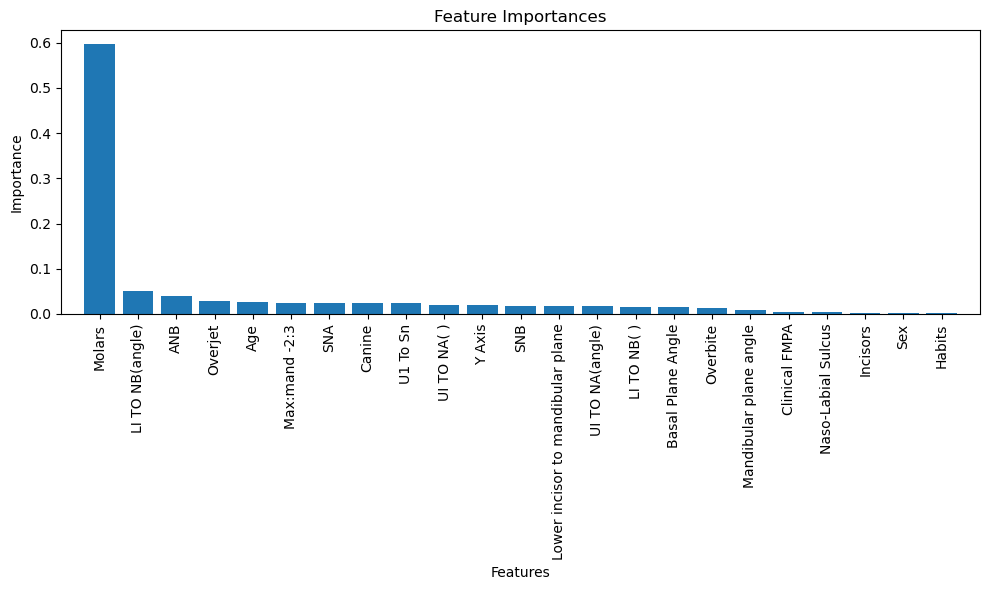

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Assuming you have a dataset loaded into a DataFrame called 'data'
# Replace 'data' with your actual DataFrame
# Assuming the target variable is named 'target'
# Replace 'target' with your actual target variable name

# Load your dataset
# data = pd.read_csv('your_dataset.csv')

# Assuming all columns are features except the target
X = merged.drop('Diagnosis', axis=1)
y = merged['Diagnosis']

# Initialize the model
model = RandomForestRegressor()

# Fit the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
